In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', None)

import warnings
warnings.simplefilter('ignore')

In [2]:
dataset = pd.read_csv('marketing_promotion_campaign.csv')
dataset

,id,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,1,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,2,6,329.08,1,1,Rural,1,Web,No Offer,0
2,3,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,4,9,675.83,1,0,Rural,1,Web,Discount,0
4,5,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...,...
63995,63996,10,105.54,1,0,Urban,0,Web,Discount,0
63996,63997,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,63998,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,63999,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


In [3]:
ID_COL, TARGET_COL = 'id', 'conversion'
features = [c for c in dataset.columns if c not in [ID_COL, TARGET_COL]]

cat_cols = ['recency',
 'used_discount',
 'used_bogo',
 'zip_code',
 'is_referral',
 'channel',
 'offer']

num_cols = [c for c in features if c not in cat_cols]

In [4]:
dataset.head()

,id,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,1,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,2,6,329.08,1,1,Rural,1,Web,No Offer,0
2,3,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,4,9,675.83,1,0,Rural,1,Web,Discount,0
4,5,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [5]:
train_data = pd.get_dummies(dataset, columns = cat_cols)

In [6]:
train_data.head()

,id,history,conversion,recency_1,recency_2,recency_3,recency_4,recency_5,recency_6,recency_7,...,zip_code_Surburban,zip_code_Urban,is_referral_0,is_referral_1,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
0,1,142.44,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
1,2,329.08,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
2,3,180.65,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,1,0,0
3,4,675.83,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,5,45.34,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0


In [7]:
train_data.shape

(64000, 30)

In [8]:
train_proc = train_data[:train_data.shape[0]].reset_index(drop = True)
features = [c for c in train_proc.columns if c not in [ID_COL, TARGET_COL]]

In [9]:
len(features)

28

In [10]:
from sklearn.model_selection import train_test_split, StratifiedKFold

trn, val = train_test_split(train_proc, test_size=0.2, random_state = 1, stratify = train_proc[TARGET_COL])

###### Input to our model will be the features
X_trn, X_val = trn[features], val[features]

###### Output of our model will be the TARGET_COL
y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]


In [11]:
X_trn.head()

,history,recency_1,recency_2,recency_3,recency_4,recency_5,recency_6,recency_7,recency_8,recency_9,...,zip_code_Surburban,zip_code_Urban,is_referral_0,is_referral_1,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
26482,386.76,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
46884,347.47,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
51426,29.99,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
12281,111.72,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
57688,110.00,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_ = scaler.fit(X_trn)

X_trn = scaler.transform(X_trn)
X_val = scaler.transform(X_val)

In [13]:
X_trn.shape

(51200, 28)

In [14]:
X_trn[:,0]

array([ 0.56407375,  0.41093157, -0.82652271, ..., -0.0022288 ,
       -0.47334855, -0.48508075])

In [15]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 1)
_ = clf.fit(X_trn, y_trn)

preds_val = clf.predict(X_val)

f1_score(y_val, preds_val)

0.0031864046733935205

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 1)
_ = clf.fit(X_trn, y_trn)

preds_val = clf.predict(X_val)

f1_score(y_val, preds_val)

0.191824739513759

In [17]:
?DecisionTreeClassifier()

Object `DecisionTreeClassifier()` not found.


In [18]:
from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128]
    
}

clf = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=100)

search = clf.fit(train_proc[features], train_proc[TARGET_COL])

search.best_params_

{'min_samples_split': 10,
 'max_leaf_nodes': 128,
 'max_features': 0.8,
 'max_depth': 12,
 'criterion': 'gini'}

In [19]:
optimal_params = {'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': 0.8,
 'max_leaf_nodes': 128,
 'min_samples_split': 10}

clf = DecisionTreeClassifier(random_state = 1, **optimal_params)
_ = clf.fit(X_trn, y_trn)

preds_val = clf.predict(X_val)

f1_score(y_val, preds_val)

0.30076700616119706

In [20]:
from sklearn.model_selection import StratifiedKFold

In [21]:
def run_clf_kfold(clf, train,features):

    N_SPLITS = 5

    oofs = np.zeros(len(train))
    #preds = np.zeros((len(test)))

    folds = StratifiedKFold(n_splits = N_SPLITS)

    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[TARGET_COL])):
        print(f'\n------------- Fold {fold_ + 1} -------------')

        ############# Get train, validation and test sets along with targets ################
  
        ### Training Set
        X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

        ### Validation Set
        X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

        ### Test Set
        #X_test = test[features]

        ############# Scaling Data ################
        scaler = StandardScaler()
        _ = scaler.fit(X_trn)

        X_trn = scaler.transform(X_trn)
        X_val = scaler.transform(X_val)
        #X_test = scaler.transform(X_test)


        ############# Fitting and Predicting ################

        _ = clf.fit(X_trn, y_trn)

        ### Instead of directly predicting the classes we will obtain the probability of positive class.
        preds_val = clf.predict_proba(X_val)[:, 1]
        #preds_test = clf.predict_proba(X_test)[:, 1]

        fold_score = f1_score(y_val, preds_val.round())
        print(f'\nF1 score for validation set is {fold_score}')

        oofs[val_idx] = preds_val
        #preds += preds_test / N_SPLITS


    oofs_score = f1_score(target, oofs.round())
    print(f'\n\nF1 score for oofs is {oofs_score}')

    return oofs

In [22]:
target = train_data[TARGET_COL]

In [23]:
dt_params = {'class_weight': 'balanced',
             'criterion': 'gini',
             'max_depth': 12,
             'max_features': 0.8,
             'max_leaf_nodes': 64,
             'min_samples_split': 40,
             'random_state': 1
             }

clf = DecisionTreeClassifier(**dt_params)
        

dt_oofs = run_clf_kfold(clf, train_proc, features)


------------- Fold 1 -------------

F1 score for validation set is 0.29306516912628966

------------- Fold 2 -------------

F1 score for validation set is 0.30876667913704947

------------- Fold 3 -------------

F1 score for validation set is 0.3042233357193987

------------- Fold 4 -------------

F1 score for validation set is 0.30511579222818264

------------- Fold 5 -------------

F1 score for validation set is 0.29548164833708757


F1 score for oofs is 0.30146759070525886


In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
rf_oofs = run_clf_kfold(clf, train_proc, features)


------------- Fold 1 -------------

F1 score for validation set is 0.16666666666666666

------------- Fold 2 -------------

F1 score for validation set is 0.16676557863501484

------------- Fold 3 -------------

F1 score for validation set is 0.16941176470588232

------------- Fold 4 -------------

F1 score for validation set is 0.15943728018757328

------------- Fold 5 -------------

F1 score for validation set is 0.17111685328739595


F1 score for oofs is 0.16669593210418496


In [25]:
rf_params = {'class_weight': "balanced",
             'n_estimators' : 200,
             'criterion': 'gini',
             'max_depth': 12,
             'max_features': 0.8,
             'max_leaf_nodes': 128,
             'min_samples_split': 10,
             'random_state': 1
             }

clf = RandomForestClassifier(**rf_params)
        

rf_oofs = run_clf_kfold(clf, train_proc, features)


------------- Fold 1 -------------

F1 score for validation set is 0.2960862166761203

------------- Fold 2 -------------

F1 score for validation set is 0.3122043519394513

------------- Fold 3 -------------

F1 score for validation set is 0.3103777444429292

------------- Fold 4 -------------

F1 score for validation set is 0.31095796002756715

------------- Fold 5 -------------

F1 score for validation set is 0.3044934412503489


F1 score for oofs is 0.3069189338489159


In [26]:
thresholds = np.arange(0, 100)/100
for thresh in thresholds:
    oofs_rounded = (rf_oofs > thresh) * 1
    thresh_score = f1_score(target, oofs_rounded)
    print(f'Threshold {thresh}: {thresh_score}')

Threshold 0.0: 0.25598822792053844
Threshold 0.01: 0.25598822792053844
Threshold 0.02: 0.25598822792053844
Threshold 0.03: 0.25598822792053844
Threshold 0.04: 0.25598822792053844
Threshold 0.05: 0.25598822792053844
Threshold 0.06: 0.25598822792053844
Threshold 0.07: 0.25598822792053844
Threshold 0.08: 0.25678242923722444
Threshold 0.09: 0.25741298986023564
Threshold 0.1: 0.257847564406989
Threshold 0.11: 0.2584844898296221
Threshold 0.12: 0.25917282331008773
Threshold 0.13: 0.25998974344758763
Threshold 0.14: 0.2605092264263763
Threshold 0.15: 0.26106595658659676
Threshold 0.16: 0.2616127001888244
Threshold 0.17: 0.2624013924370455
Threshold 0.18: 0.26291489541398044
Threshold 0.19: 0.26335463303852286
Threshold 0.2: 0.26391011490349237
Threshold 0.21: 0.2643802169098859
Threshold 0.22: 0.26489104116222756
Threshold 0.23: 0.2652341015273392
Threshold 0.24: 0.26585660117200965
Threshold 0.25: 0.2665278199621064
Threshold 0.26: 0.26800239496473266
Threshold 0.27: 0.26937558137818
Thresho

In [27]:
def get_optimal_f1_thresh(target, oofs):
    thresholds = np.arange(0, 100)/100
    thresh_scores = []
    for thresh in thresholds:
        oofs_rounded = (rf_oofs > thresh) * 1
        thresh_score = f1_score(target, oofs_rounded)
        thresh_scores.append(thresh_score)
  
    all_thresholds_and_scores = pd.Series(index = thresholds, data = thresh_scores)
    all_thresholds_and_scores.plot(figsize=(10, 6), fontsize=14)
  
    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('F1 Score', fontsize=14)

    return all_thresholds_and_scores.sort_values(ascending=False).index.values[0]

Optimal threhold is 0.5


0.3069189338489159

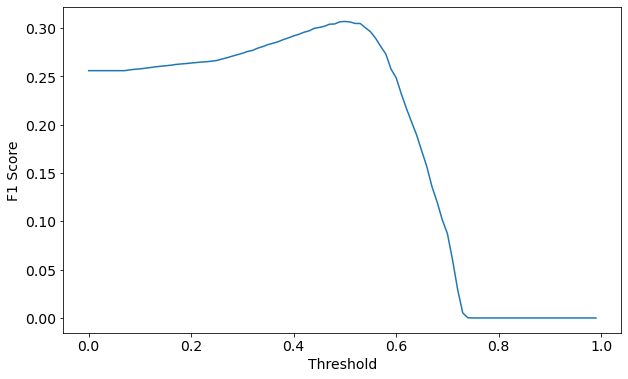

In [28]:
optimal_thresh = get_optimal_f1_thresh(target, rf_oofs)
print(f'Optimal threhold is {optimal_thresh}')
f1_score(target, (rf_oofs > optimal_thresh) * 1)

In [29]:
import pickle
# save the model to disk
filename = 'rf_sklearn_model.pkl'
pickle.dump(clf, open(filename, 'wb'))